In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
def get_bout_statistics_for_predictions(pred):
    total_0 = pred.value_counts()*10/60 # total duration in minutes
    bout_lengths = {
    'P':[],
    'S':[],
    'W':[],
    'X':[],
    'A':[]
    }
    transition_matrix = pd.DataFrame(np.zeros((5,5)),columns=['P','S','W','X','A'],index=['P','S','W','X','A'])

    current_state = 'A'
    current_length = 0
    for epoch in pred:
        transition_matrix.loc[current_state,epoch] += 1
        if(epoch != current_state):
            bout_lengths[current_state].append(current_length)
            current_state = epoch
            current_length = 0
        current_length += 1
    bout_lengths[current_state].append(current_length)
    total_1 = {key:sum(bout_lengths[key])*10/60 for key in bout_lengths}
    average = {key:np.mean(bout_lengths[key])*10 for key in bout_lengths}
    counts = {key:len(bout_lengths[key]) for key in bout_lengths}
    
    return pd.Series(total_0,name='total_value_counts'),pd.Series(total_1,name='total_computed'),pd.Series(average,name='average'),pd.Series(counts,name='counts')

In [ ]:
average_bout_duration = pd.DataFrame()
total_bout_duration = pd.DataFrame()
average_number_of_bouts = pd.DataFrame()
for i in tqdm(range(32)):
    pred = pd.read_csv(f'data/raw/{i}.csv')['label']
    total_0,total_1,average,counts = get_bout_statistics_for_predictions(pred)
    average_bout_duration = pd.concat([average_bout_duration,average],axis=1)
    total_bout_duration = pd.concat([total_bout_duration,total_1],axis=1)
    average_number_of_bouts = pd.concat([average_number_of_bouts,counts],axis=1)
average_bout_duration = average_bout_duration.drop(['X','A']).T.reset_index(drop=True)
total_bout_duration = total_bout_duration.drop(['X','A']).T.reset_index(drop=True)
average_number_of_bouts = average_number_of_bouts.drop(['X','A']).T.reset_index(drop=True)

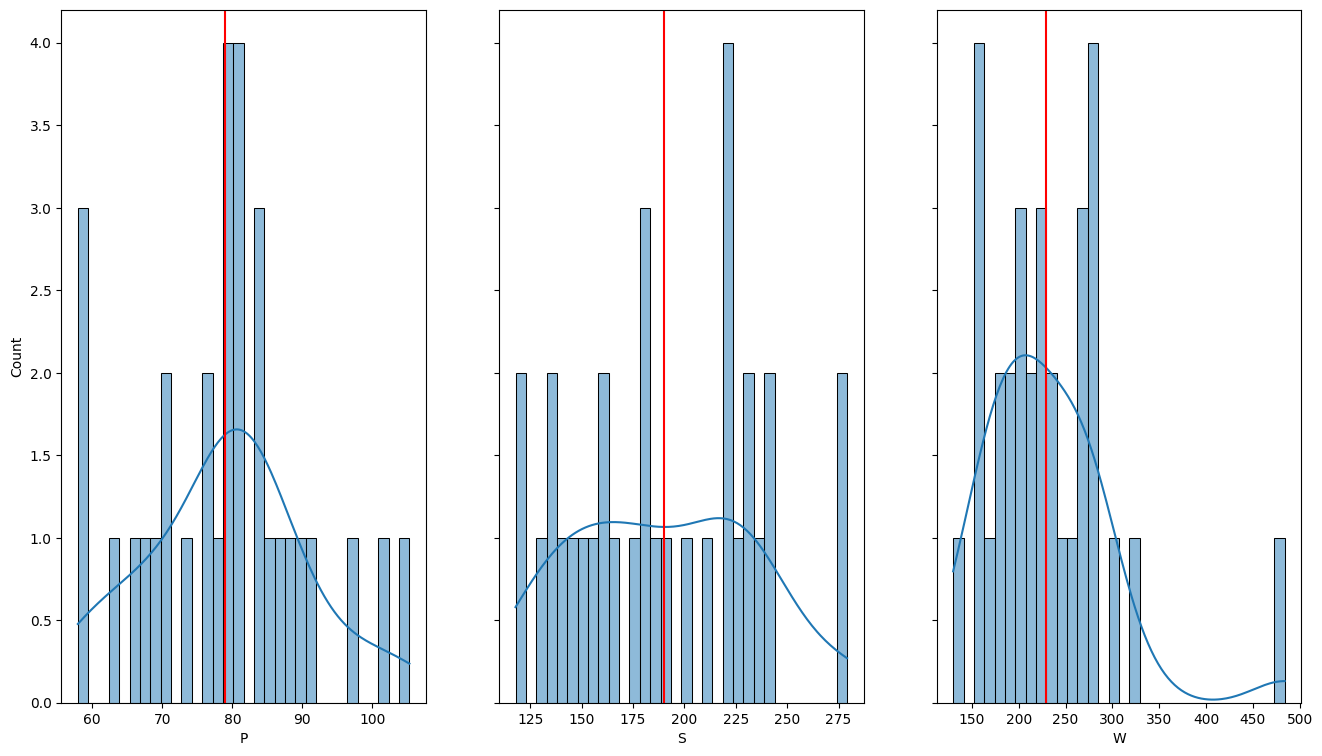

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,axes = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(16,9))
sns.histplot(average_bout_duration['P'],bins=32,kde=True,ax=axes[0])
sns.histplot(average_bout_duration['S'],bins=32,kde=True,ax=axes[1])
sns.histplot(average_bout_duration['W'],bins=32,kde=True,ax=axes[2])
axes[0].axvline(average_bout_duration['P'].mean(),color='red')
axes[1].axvline(average_bout_duration['S'].mean(),color='red')
axes[2].axvline(average_bout_duration['W'].mean(),color='red')

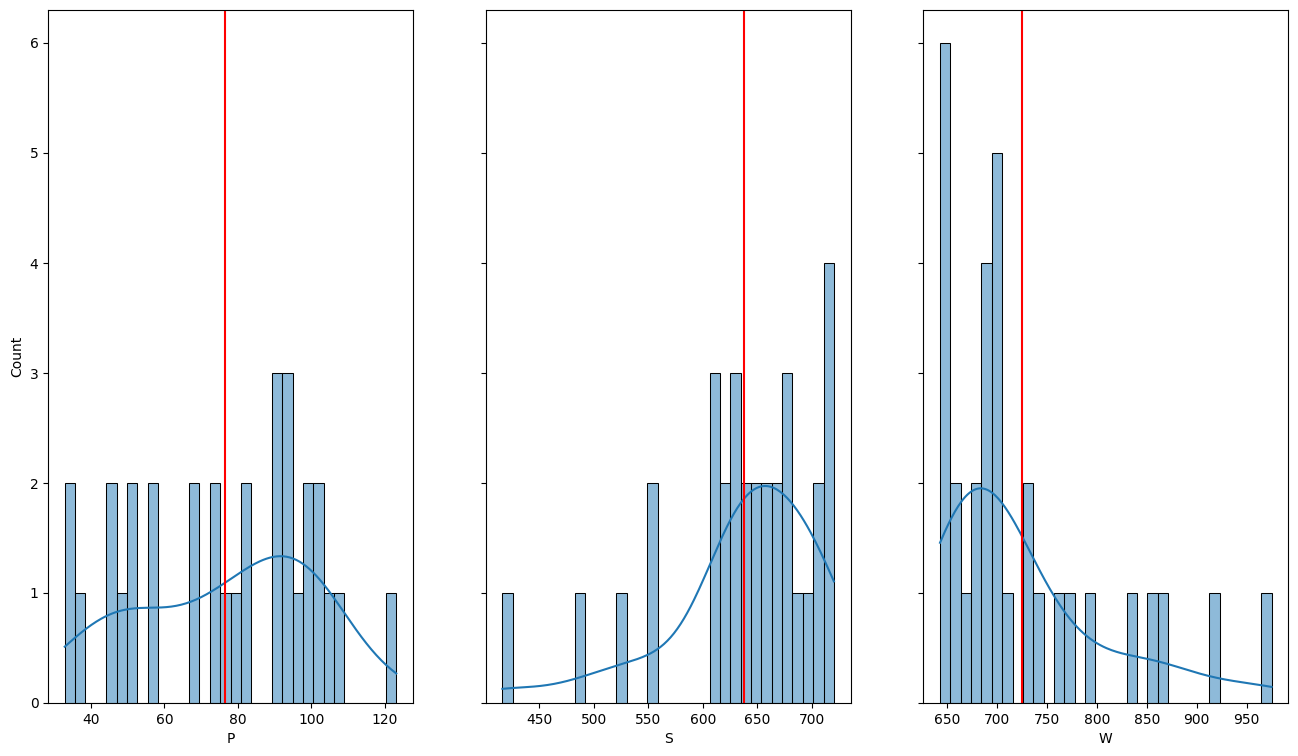

In [94]:
fig,axes = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(16,9))
sns.histplot(total_bout_duration['P'],bins=32,kde=True,ax=axes[0])
sns.histplot(total_bout_duration['S'],bins=32,kde=True,ax=axes[1])
sns.histplot(total_bout_duration['W'],bins=32,kde=True,ax=axes[2])
axes[0].axvline(total_bout_duration['P'].mean(),color='red')
axes[1].axvline(total_bout_duration['S'].mean(),color='red')
axes[2].axvline(total_bout_duration['W'].mean(),color='red')

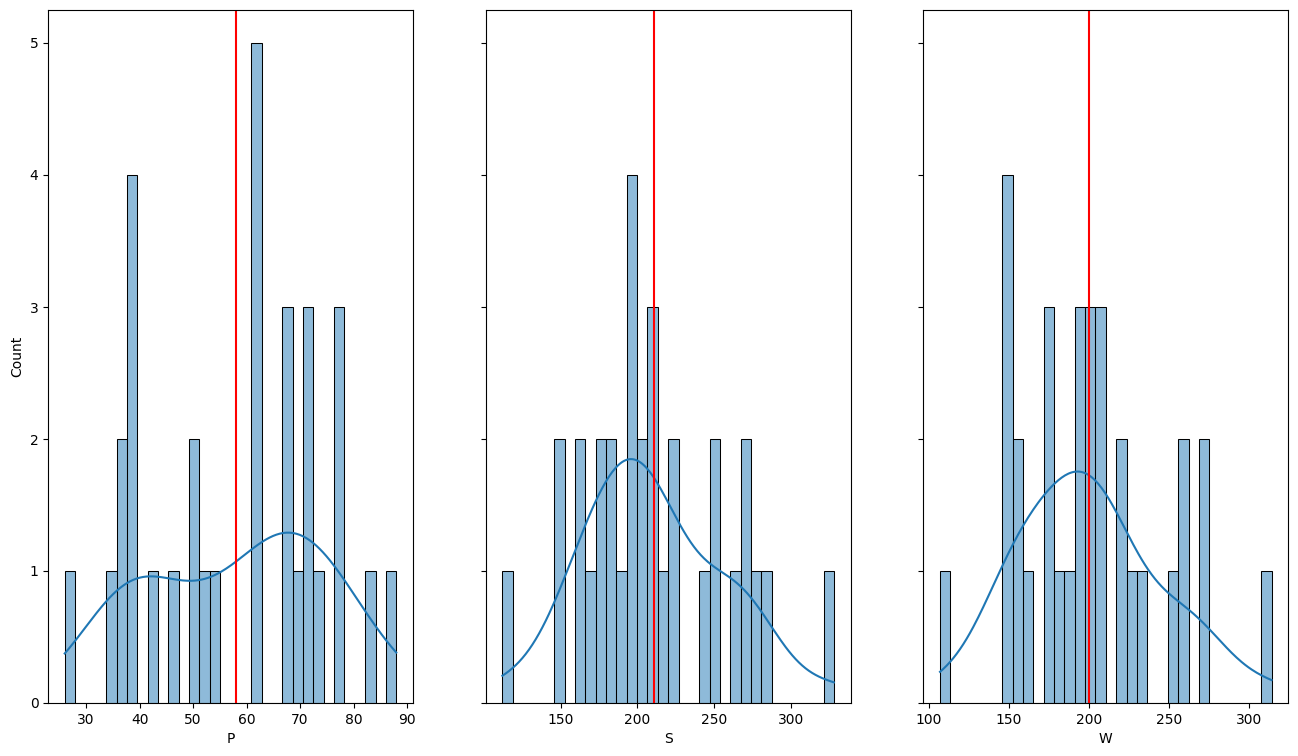

In [95]:
fig,axes = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(16,9))
sns.histplot(average_number_of_bouts['P'],bins=32,kde=True,ax=axes[0])
sns.histplot(average_number_of_bouts['S'],bins=32,kde=True,ax=axes[1])
sns.histplot(average_number_of_bouts['W'],bins=32,kde=True,ax=axes[2])
axes[0].axvline(average_number_of_bouts['P'].mean(),color='red')
axes[1].axvline(average_number_of_bouts['S'].mean(),color='red')
axes[2].axvline(average_number_of_bouts['W'].mean(),color='red')

In [ ]:
transition_matrix = transition_matrix.drop('X').drop('X',axis=1)

In [ ]:
import seaborn as sns
sns.heatmap(transition_matrix/16,annot=True,fmt='.0f')